In [ ]:
## Reference: https://www.youtube.com/watch?v=xekqR10lQNo
## For personal study purposes only

In [4]:
from dowhy import datasets

import pandas as pd
import numpy as np

from causalinference import CausalModel

from datetime import datetime

from statsmodels.tsa.arima_process import ArmaProcess

from causalimpact import CausalImpact

In [12]:
arparams = np.array([0.95, 0.05])
maparams = np.array([0.6, 0.3])

arma_process = ArmaProcess.from_coeffs(arparams, maparams)

X = 10 + arma_process.generate_sample(nsample = 500)
y = 2 * X + np.random.normal(size=500)

y[300:] += 10

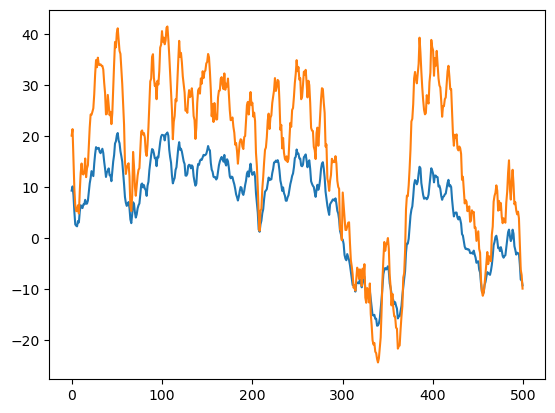

In [13]:
import matplotlib.pyplot as plt
plt.plot(X)
plt.plot(y)

In [14]:
dates = pd.date_range('2021-01-01', freq='D', periods =500)

df = pd.DataFrame({'dates': dates, 'y': y, 'X': X}, columns = ['dates', 'y', 'X'])
df.set_index('dates', inplace= True)

df.head()

,y,X
dates,,
2021-01-01,20.143760,9.328442
2021-01-02,21.407988,10.146153
2021-01-03,15.707193,8.461087
2021-01-04,9.718194,5.225484
2021-01-05,6.425377,2.688480


In [16]:
df.index.min(), df.index.max(), df.index[300]

(Timestamp('2021-01-01 00:00:00'),
 Timestamp('2022-05-15 00:00:00'),
 Timestamp('2021-10-28 00:00:00'))

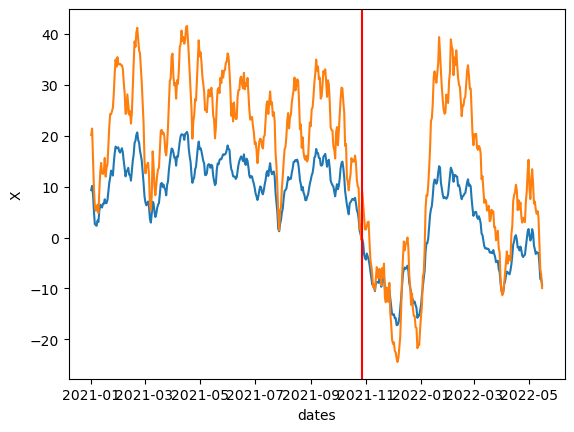

In [18]:
import seaborn as sns
sns.lineplot(x=df.index, y=df['X'])
sns.lineplot(x=df.index, y =df['y'])
plt.axvline(x=df.index[300], color='red')

In [22]:
pre_period = [str(df.index.min())[:10], str(df.index[299])[:10]]
post_period = [str(df.index[300])[:10], str(df.index.max())[:10]]

pre_period, post_period

(['2021-01-01', '2021-10-27'], ['2021-10-28', '2022-05-15'])

In [20]:
pre_daily_avg = df['y'][:300].mean()
post_daily_avg = df['y'][300:].mean()

post_daily_avg - pre_daily_avg

In [21]:
impact = CausalImpact(
    data = df,
    pre_period = pre_period,
    post_period = post_period,
)
impact.plot()

AttributeError: 'NoneType' object has no attribute 'iloc'

<Figure size 1500x1200 with 0 Axes>